- ## Notebook 2 - Sql Server

## Topics Covered in this notebook

```
1. Commonly used Built-in string functions in SQL server
2. Date Time functions in SQL Server
3. Cast and Convert
4. Mathematical functions in SQL Server
5. Scalar user-defined functions
6. Inline table-valued functions
7. Multi statement table-valued functions
8. Important concepts related to functions
9. Temporary tables in SQL Server
10. Indexes in SQL Server
11. Clustered and Nonclustered Indexes
12. Unique and Non Unique Indexes
13. Advantages and Disadvantages of Indexes in SQL Server
```

In [1]:
Use kudvenkatdb_master;

Commands completed successfully.

Total execution time: 00:00:00.013

## Commonly used Built in string functions in sql server

```
1. ASCII(Character_Expression) - Returns the ASCII code of the given character.
2. CHAR(Integer_Expression)  - Converts an int ASCII code to a character. The Integer_Expression, should be between 0 and 255.
3. LTRIM(Character_Expression) - Removes blank on the left handside of the given character expression.
4. RTRIM(Character_Expression) - Removes blank on the right handside of the given character expression.
5. LOWER(Character_Expression) - Converts all the characters in the given Character_Expression, to lowercase letters.
6. UPPER(Character_Expression) - Converts all the characters in the given Character_Expression, to uppercase letters.
7. REVERSE('Any_String_Expression') - Reverse all the characters in the given string expression.
8. LEN(String_Expression) - Returns the count of total characters, in the given string expression, excluding the blanks at the end of the expression.
8. LEFT(string,no_of_chars) - The LEFT() function extracts a number of characters from a string (starting from left).
9. RIGHT(string,no_of_chars) - The LEFT() function extracts a number of characters from a string (starting from right).
10. CHARINDEX('Expression_To_Find','Expression_To_Search','Start_Location')  - Returns the starting position of the expression in a character string.
11. SUBSTRING('Expression','Start','Length') - Returns substring (part of the string), from the given expression.
12. REPLICATE(String_To_Be_Replicated,Number_Of_Times) - Repeats the given string, for the specified number of times.
13. SPACE(Number_Of_Spaces) - Returns number of spaces, specified by the Number_Of_Spaces argument.
14. PATINDEX('%Pattern%',Expression) - Returns the starting position of the first occurrence of a pattern in a specified expression. It takes two arguments, the pattern to be searched and the expression. PATINDEX() is similar to CHARINDEX().
    WITH CHARINDEX() we cannot use wildcards, where as PATINDEX() provides this capability. If the specified pattern is not found, PATINDEX() returns ZERO.

15. REPLACE(String_Expression,Pattern,Replacement_Value) - Replaces all occurrences of a specified string value with another string value.

16. STUFF(Original_Expression,Start,Length,Replacement-Expression) - Inserts the Replacement_Expression, at the start position specified, along with removing the characters specified using Length parameter.

```

In [ ]:
SELECT ASCII('A')

SELECT CHAR(65)

SELECT LEFT('ABCDEF',3)
SELECT RIGHT('ABCDEF',3)

SELECT CHARINDEX('@','sara@aaa.com',1) -- if you want to find the location of the '@' in the email, and the last parameter is where you need to define the starting lcoation of the serach and It is optional

SELECT SUBSTRING('sara@aaa.com',6,7)

SELECT SUBSTRING('aaa@aaa.com',CHARINDEX('@','aaa@aaa.com'),LEN('aaa@aaa.com') -CHARINDEX('@','aaa@aaa.com')+1)

DECLARE @Start INT, @Result NVARCHAR(100)
Set @Start = 65
SET @Result = ''
WHILE (@Start <= 90)
BEGIN
    SET @Result = @Result +  CHAR(@Start) + ', '
    SET @Start = @Start + 1
END
SET @Result = LEFT(@Result,LEN(@Result)-1)
PRINT @Result

In [36]:
SELECT* FROM tblPerson

SELECT SUBSTRING(Email,CHARINDEX('@',Email),LEN('aaa@aaa.com') -CHARINDEX('@',Email)+1) as Email,
COUNT(Email)
from tblPerson
GROUP BY SUBSTRING(Email,CHARINDEX('@',Email),LEN('aaa@aaa.com') -CHARINDEX('@',Email)+1)


(10 rows affected)

(7 rows affected)

Total execution time: 00:00:00.009

ID,Name,Email,GenderID,Age
1,Jade,j@j.com,2,NULL
2,Mary,m@m.com,3,NULL
3,Martin,ma@ma.com,1,NULL
4,Rob,r@r.com,NULL,NULL
5,May,may@may.com,2,NULL
7,Rich,ri@ri.com,2,NULL
8,Mike,mi@mi.com,NULL,NULL
10,Rock,Rock@r.com,3,2
11,Sam,sam@r.com,3,100
12,Rock,r1@r.com,1,25


Email,(No column name)
@j.com,1
@m.com,1
@ma.com,1
@may.com,1
@mi.com,1
@r.com,4
@ri.com,1


In [53]:
CREATE TABLE  tblAGENTS 
   (	
    "AGENT_CODE" CHAR(6) NOT NULL PRIMARY KEY, 
	"AGENT_NAME" CHAR(40), 
    "AGENT_EMAIL" NVARCHAR(50),
	"WORKING_AREA" CHAR(35), 
	"COMMISSION" FLOAT, 
	"PHONE_NO" CHAR(15), 
	"COUNTRY" VARCHAR(25) 
	 );

Commands completed successfully.

Total execution time: 00:00:00.003

In [54]:
INSERT INTO tblAGENTS VALUES ('A007', 'Arvind','arvind@aaa.com', 'Bangalore', '0.15', '077-25814763', '');
INSERT INTO tblAGENTS VALUES ('A003', 'Alex ', 'arvind@aaa.com', 'London', '0.13', '075-12458969', '');
INSERT INTO tblAGENTS VALUES ('A008', 'Alford','arvind@aaa.com',  'New York', '0.12', '044-25874365', '');
INSERT INTO tblAGENTS VALUES ('A011', 'Ravi Kumar','arvind@aaa.com',  'Bangalore', '0.15', '077-45625874', '');
INSERT INTO tblAGENTS VALUES ('A010', 'Santakumar','arvind@aaa.com',  'Chennai', '0.14', '007-22388644', '');
INSERT INTO tblAGENTS VALUES ('A012', 'Lucida','arvind@aaa.com',  'San Jose', '0.12', '044-52981425', '');
INSERT INTO tblAGENTS VALUES ('A005', 'Anderson','anderson@aaa.com',  'Brisban', '0.13', '045-21447739', '');
INSERT INTO tblAGENTS VALUES ('A001', 'Subbarao','subbaroa@sss.com',  'Bangalore', '0.14', '077-12346674', '');
INSERT INTO tblAGENTS VALUES ('A002', 'Mukesh','mukesh@mmm.com',  'Mumbai', '0.11', '029-12358964', '');
INSERT INTO tblAGENTS VALUES ('A006', 'McDen','mcdean@mmm.com',  'London', '0.15', '078-22255588', '');
INSERT INTO tblAGENTS VALUES ('A004', 'Ivan', 'ivan@iii.com', 'Torento', '0.15', '008-22544166', '');
INSERT INTO tblAGENTS VALUES ('A009', 'Benjamin','benjamin@bbb.com',  'Hampshair', '0.11', '008-22536178', '');

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.007

## Wrap the email with ***** like-> iam*******@gmail.com

In [58]:
SELECT * FROM tblAGENTS;

-- Wrap the email with the *******

SELECT AGENT_NAME, SUBSTRING(AGENT_EMAIL,1,2)+REPLICATE('*',5)+SUBSTRING(AGENT_EMAIL,CHARINDEX('@',AGENT_EMAIL),LEN(AGENT_EMAIL) -CHARINDEX('@',AGENT_EMAIL)+1)AS AGENT_EMAIL, WORKING_AREA, COMMISSION FROM tblAGENTS;

(12 rows affected)

(12 rows affected)

Total execution time: 00:00:00.009

AGENT_CODE,AGENT_NAME,AGENT_EMAIL,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
A001,Subbarao,subbaroa@sss.com,Bangalore,0.14,077-12346674,
A002,Mukesh,mukesh@mmm.com,Mumbai,0.11,029-12358964,
A003,Alex,arvind@aaa.com,London,0.13,075-12458969,
A004,Ivan,ivan@iii.com,Torento,0.15,008-22544166,
A005,Anderson,anderson@aaa.com,Brisban,0.13,045-21447739,
A006,McDen,mcdean@mmm.com,London,0.15,078-22255588,
A007,Arvind,arvind@aaa.com,Bangalore,0.15,077-25814763,
A008,Alford,arvind@aaa.com,New York,0.12,044-25874365,
A009,Benjamin,benjamin@bbb.com,Hampshair,0.11,008-22536178,
A010,Santakumar,arvind@aaa.com,Chennai,0.14,007-22388644,


AGENT_NAME,AGENT_EMAIL,WORKING_AREA,COMMISSION
Subbarao,su*****@sss.com,Bangalore,0.14
Mukesh,mu*****@mmm.com,Mumbai,0.11
Alex,ar*****@aaa.com,London,0.13
Ivan,iv*****@iii.com,Torento,0.15
Anderson,an*****@aaa.com,Brisban,0.13
McDen,mc*****@mmm.com,London,0.15
Arvind,ar*****@aaa.com,Bangalore,0.15
Alford,ar*****@aaa.com,New York,0.12
Benjamin,be*****@bbb.com,Hampshair,0.11
Santakumar,ar*****@aaa.com,Chennai,0.14


In [65]:
-- PATINDEX()

SELECT AGENT_EMAIL, PATINDEX('%aaa.com',AGENT_EMAIL) as FirstOccurrencec
FROM tblAGENTS
WHERE PATINDEX('%aaa.com',AGENT_EMAIL) > 0


-- REPLACE()

SELECT AGENT_EMAIL, REPLACE(AGENT_EMAIL,'.com','.net') as ConvertedEmail 
FROM tblAGENTS

-- STUFF()

SELECT AGENT_EMAIL, STUFF(AGENT_EMAIL,2,5,'*****') as StuffedEmail
FROM tblAGENTS

(7 rows affected)

(12 rows affected)

(12 rows affected)

Total execution time: 00:00:00.021

AGENT_EMAIL,FirstOccurrencec
arvind@aaa.com,8
anderson@aaa.com,10
arvind@aaa.com,8
arvind@aaa.com,8
arvind@aaa.com,8
arvind@aaa.com,8
arvind@aaa.com,8


AGENT_EMAIL,ConvertedEmail
subbaroa@sss.com,subbaroa@sss.net
mukesh@mmm.com,mukesh@mmm.net
arvind@aaa.com,arvind@aaa.net
ivan@iii.com,ivan@iii.net
anderson@aaa.com,anderson@aaa.net
mcdean@mmm.com,mcdean@mmm.net
arvind@aaa.com,arvind@aaa.net
arvind@aaa.com,arvind@aaa.net
benjamin@bbb.com,benjamin@bbb.net
arvind@aaa.com,arvind@aaa.net


AGENT_EMAIL,StuffedEmail
subbaroa@sss.com,s*****oa@sss.com
mukesh@mmm.com,m*****@mmm.com
arvind@aaa.com,a*****@aaa.com
ivan@iii.com,i*****ii.com
anderson@aaa.com,a*****on@aaa.com
mcdean@mmm.com,m*****@mmm.com
arvind@aaa.com,a*****@aaa.com
arvind@aaa.com,a*****@aaa.com
benjamin@bbb.com,b*****in@bbb.com
arvind@aaa.com,a*****@aaa.com


## DateTime

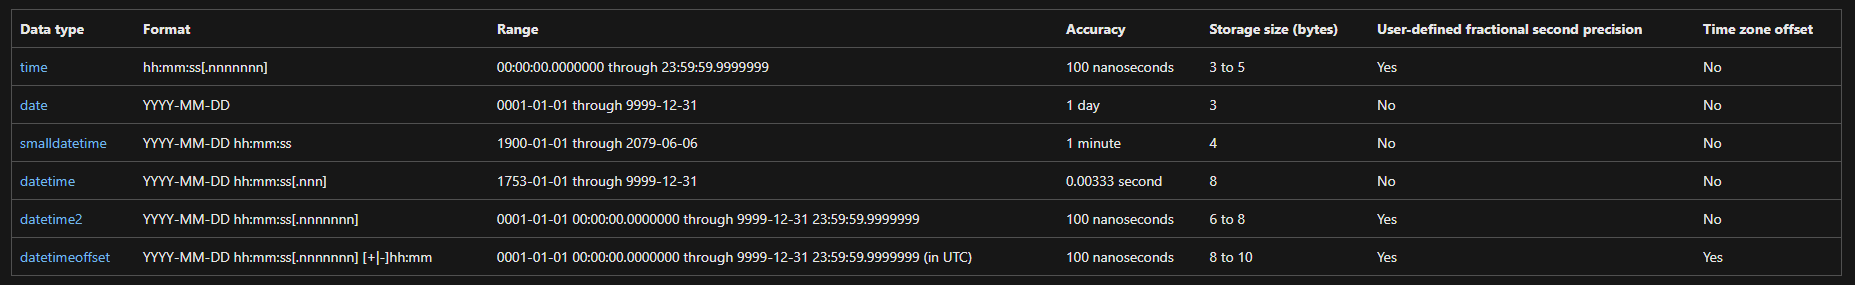

### UTC stands for Coordinated Universal Time, based on which, the world regulates clocks and time. There are slight differences between GMT and UTC, but for most common purposes, UTC is synonymous with GMT.

## DateTime Functions

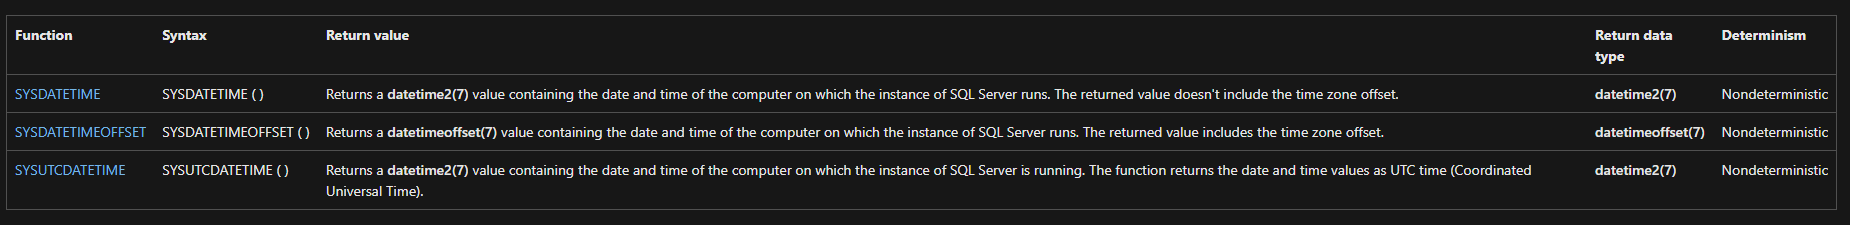

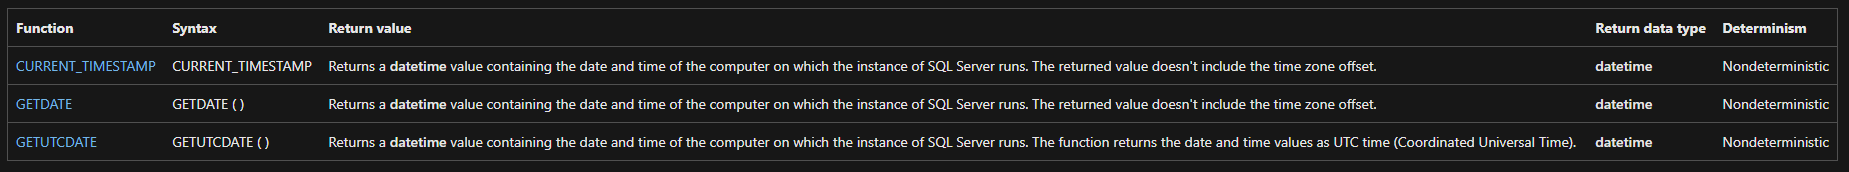  
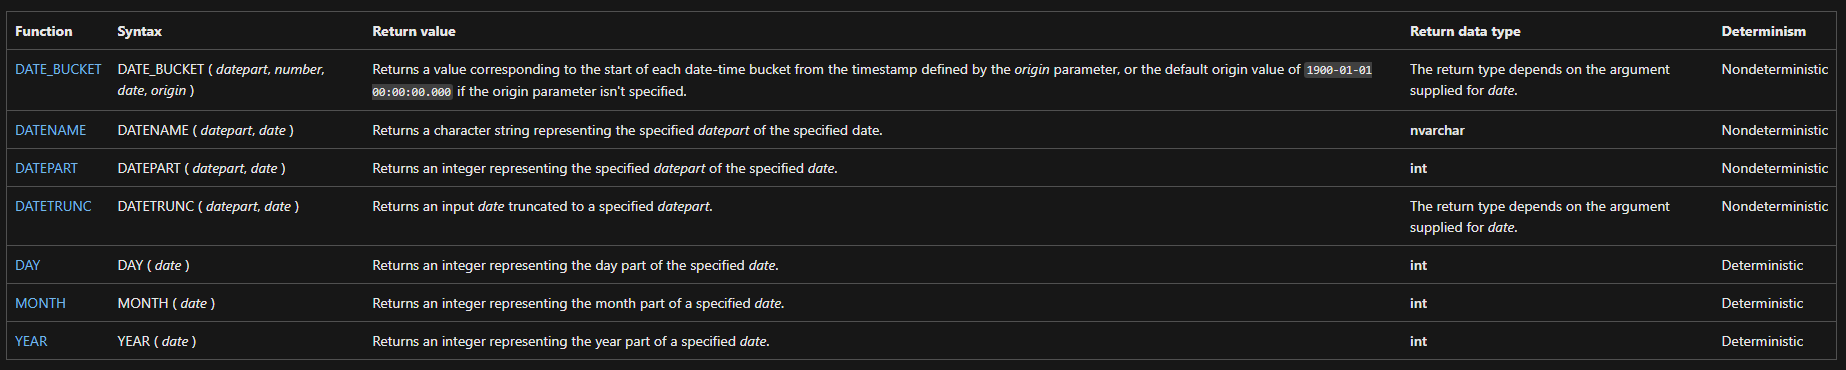

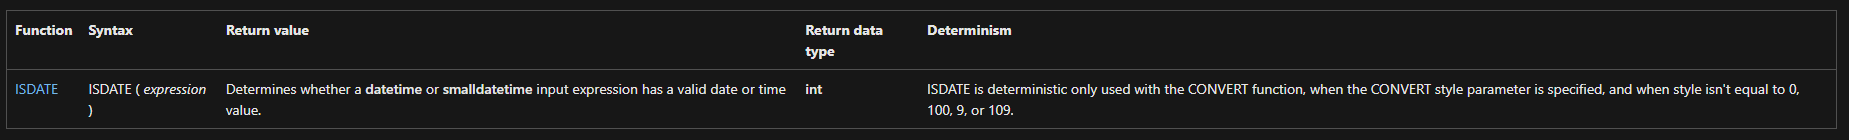  

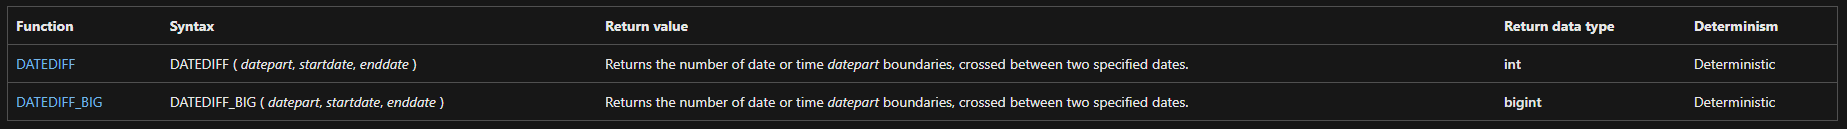

In [2]:
CREATE TABLE tblDateTime(
    C_TIME TIME(7) NULL,
    C_DATE DATE NULL,
    C_SMALLDATETIME SMALLDATETIME NULL,
    C_DATETIME DATETIME NULL,
    C_DATETIME2 DATETIME2(7) NULL,
    C_DATETIMEOFFSET DATETIMEOFFSET(7) NULL
);

Commands completed successfully.

Total execution time: 00:00:00.005

In [11]:
-- INSERT INTO tblDateTime VALUES (GETDATE(), GETDATE(), GETDATE(), GETDATE(), GETDATE(), GETDATE())
SELECT * FROM tblDateTime;

SELECT DATENAME(MONTH,'2024-06-12')
SELECT DATENAME(DAY,'2024-06-12')
SELECT DATENAME(YEAR,'2024-06-12')
SELECT DATENAME(WEEKDAY,'2024-08-03')

(2 rows affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.032

C_TIME,C_DATE,C_SMALLDATETIME,C_DATETIME,C_DATETIME2,C_DATETIMEOFFSET
05:26:10.3133333,2024-01-05,2024-01-05 05:26:00,2024-01-05 05:26:10.313,2024-01-05 05:26:10.3133333,2024-01-05 05:26:10.3133333 +00:00
05:46:07.0333333,2024-01-05,2024-01-05 05:46:00,2024-01-05 05:46:07.033,2024-01-05 05:46:07.0333333,2024-01-05 05:46:07.0333333 +00:00


(No column name)
June


(No column name)
12


(No column name)
2024


(No column name)
Saturday


In [19]:
DECLARE @DOB DATETIME, @tmpDate DATETIME, @years INT, @months INT, @days INT
SET @DOB = '06/12/1999' -- mm/dd/yy

SELECT @tmpDate = @DOB

SELECT @years = DATEDIFF(YEAR,@tmpDate,GETDATE()) - 
                CASE 
                    WHEN ((MONTH(@DOB) > MONTH(GETDATE())) OR 
                    (MONTH(@DOB) = MONTH(GETDATE())) AND DAY(@DOB) > DAY(GETDATE()))
                    THEN 1 ELSE 0
                END
SELECT @tmpDate = DATEADD(YEAR, @years,@tmpDate)

SELECT @months = DATEDIFF(MONTH, @tmpDate, GETDATE()) - 
                CASE
                    WHEN DAY(@DOB) > DAY(GETDATE())
                    THEN 1 ELSE 0
                END

SELECT @tmpDate = DATEADD(MONTH,@months,@tmpDate)

SELECT @days = DATEDIFF(DAY, @tmpDate, GETDATE())

SELECT @years AS Years, @months AS Months, @days as Days

(1 row affected)

Total execution time: 00:00:00.002

Years,Months,Days
24,6,25


In [28]:
-- Create a function of the above, calculating age...\
CREATE FUNCTION fnCalculateAge(@DOB DATETIME)
    RETURNS NVARCHAR(50)
    AS
    BEGIN
    DECLARE @tmpDate DATETIME, @years INT, @months INT, @days INT

    SELECT @tmpDate = @DOB

    SELECT @years = DATEDIFF(YEAR,@tmpDate,GETDATE()) - 
                    CASE 
                        WHEN ((MONTH(@DOB) > MONTH(GETDATE())) OR 
                        (MONTH(@DOB) = MONTH(GETDATE())) AND DAY(@DOB) > DAY(GETDATE()))
                        THEN 1 ELSE 0
                    END
    SELECT @tmpDate = DATEADD(YEAR, @years,@tmpDate)

    SELECT @months = DATEDIFF(MONTH, @tmpDate, GETDATE()) - 
                    CASE
                        WHEN DAY(@DOB) > DAY(GETDATE())
                        THEN 1 ELSE 0
                    END

    SELECT @tmpDate = DATEADD(MONTH,@months,@tmpDate)

    SELECT @days = DATEDIFF(DAY, @tmpDate, GETDATE())

    DECLARE @Age NVARCHAR(50)
    SET @Age =  CAST(@years as nvarchar(4)) + ' Years ' + CAST(@months as nvarchar(2)) + ' Months ' + CAST(@days as nvarchar(2)) + ' Days Old '     
    RETURN @Age
END


Commands completed successfully.

Total execution time: 00:00:00.001

In [31]:
SELECT dbo.fnCalculateAge('03/27/2001') -- mm/dd/yy

(1 row affected)

Total execution time: 00:00:00.005

(No column name)
22 Years 9 Months 10 Days Old


## Cast & Convert functions

```
To convert one data type to another, CAST and CONVERT functions can be used.

CAST ( expression AS data_type [ ( length ) ] )
CONVERT ( data_type [ ( length ) ] , expression [ , style ] )

**Note: We can use the style which we want as date, for more: https://learn.microsoft.com/en-us/sql/t-sql/functions/cast-and-convert-transact-sql?view=sql-server-ver16

- Style only works with CONVERT()

Style       |       DateFormat
101         |       mm/dd/yyyy
102         |       yyyy.mm.dd
103         |       dd/mm/yyyy
104         |       dd.mm.yyyy
105         |       dd-mm-yyyy

## Difference b/w CAST - CONVERT    

    1. Cast is based on ANSI standard and Convert is specific to SQL Server. So, if portability is a concern and if you want to use the script with other database applications, use CAST().

    2. Convert provides more flexibility than Cast. For example, It's possible to control how you want DateTime datatypes to be converted using styles with convert function.

**Note: The general guideline is to use CAST(), unless you want to take advantage of the style functionality in CONVERT().

```

In [32]:
CREATE TABLE  tblEvent 
   (	
    "AGENT_CODE" CHAR(6) NOT NULL PRIMARY KEY, 
	"AGENT_NAME" CHAR(40), 
    "AGENT_EMAIL" NVARCHAR(50),
	"WORKING_AREA" CHAR(35), 
	"COMMISSION" FLOAT, 
	"PHONE_NO" CHAR(15), 
	"COUNTRY" VARCHAR(25),
    "REGISTRATION_DATE" DATETIME  
	 );

Commands completed successfully.

Total execution time: 00:00:00.004

In [46]:
-- INSERT INTO tblEvent VALUES ('A007', 'Arvind','arvind@aaa.com', 'Bangalore', '0.15', '077-25814763', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A003', 'Alex ', 'arvind@aaa.com', 'London', '0.13', '075-12458969', '', '2024-01-02 23:27:24.013');
-- INSERT INTO tblEvent VALUES ('A008', 'Alford','arvind@aaa.com',  'New York', '0.12', '044-25874365', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A011', 'Ravi Kumar','arvind@aaa.com',  'Bangalore', '0.15', '077-45625874', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A010', 'Santakumar','arvind@aaa.com',  'Chennai', '0.14', '007-22388644', '', '2024-01-06 23:27:24.013');
-- INSERT INTO tblEvent VALUES ('A012', 'Lucida','arvind@aaa.com',  'San Jose', '0.12', '044-52981425', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A005', 'Anderson','anderson@aaa.com',  'Brisban', '0.13', '045-21447739', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A001', 'Subbarao','subbaroa@sss.com',  'Bangalore', '0.14', '077-12346674', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A002', 'Mukesh','mukesh@mmm.com',  'Mumbai', '0.11', '029-12358964', '', '2024-01-02 23:27:24.013');
-- INSERT INTO tblEvent VALUES ('A006', 'McDen','mcdean@mmm.com',  'London', '0.15', '078-22255588', '', GETDATE());
-- INSERT INTO tblEvent VALUES ('A004', 'Ivan', 'ivan@iii.com', 'Torento', '0.15', '008-22544166', '', '2024-01-01 23:27:24.013');
-- INSERT INTO tblEvent VALUES ('A009', 'Benjamin','benjamin@bbb.com',  'Hampshair', '0.11', '008-22536178', '', '2024-01-01 23:27:24.013');

(1 row affected)

Total execution time: 00:00:00

In [56]:
-- SELECT * FROM tblEvent

SELECT AGENT_CODE, REGISTRATION_DATE FROM tblEvent;
SELECT AGENT_CODE, CAST(REGISTRATION_DATE AS date) AS REGISTERATION_DATE FROM tblEvent;
SELECT AGENT_CODE, CONVERT(nvarchar, REGISTRATION_DATE, 101) AS REGISTERATION_DATE FROM tblEvent;

(12 rows affected)

(12 rows affected)

(12 rows affected)

Total execution time: 00:00:00.009

AGENT_CODE,REGISTRATION_DATE
A001,2024-01-06 23:30:37.307
A002,2024-01-02 23:27:24.013
A003,2024-01-02 23:27:24.013
A004,2024-01-01 23:27:24.013
A005,2024-01-06 23:30:33.760
A006,2024-01-06 23:30:56.200
A007,2024-01-06 23:27:24.013
A008,2024-01-06 23:29:41.217
A009,2024-01-01 23:27:24.013
A010,2024-01-06 23:27:24.013


AGENT_CODE,REGISTERATION_DATE
A001,2024-01-06
A002,2024-01-02
A003,2024-01-02
A004,2024-01-01
A005,2024-01-06
A006,2024-01-06
A007,2024-01-06
A008,2024-01-06
A009,2024-01-01
A010,2024-01-06


AGENT_CODE,REGISTERATION_DATE
A001,01/06/2024
A002,01/02/2024
A003,01/02/2024
A004,01/01/2024
A005,01/06/2024
A006,01/06/2024
A007,01/06/2024
A008,01/06/2024
A009,01/01/2024
A010,01/06/2024


In [57]:
-- Write a query to count the no. of registerations on the date wise

SELECT      REGISTRATION_DATE, COUNT(AGENT_CODE) AS ID
FROM        tblEvent
GROUP BY    REGISTRATION_DATE

SELECT      CAST(REGISTRATION_DATE AS DATE), COUNT(AGENT_CODE) AS ID
FROM        tblEvent
GROUP BY    CAST(REGISTRATION_DATE AS DATE)

(9 rows affected)

(3 rows affected)

Total execution time: 00:00:00.016

REGISTRATION_DATE,ID
2024-01-01 23:27:24.013,2
2024-01-02 23:27:24.013,2
2024-01-06 23:27:24.013,2
2024-01-06 23:29:41.217,1
2024-01-06 23:29:55.090,1
2024-01-06 23:30:28.777,1
2024-01-06 23:30:33.760,1
2024-01-06 23:30:37.307,1
2024-01-06 23:30:56.200,1


(No column name),ID
2024-01-01,2
2024-01-02,2
2024-01-06,8


## Mathematical functions in SQL Server
    The following scalar functions perform a calculation, usually based on input values that are provided as arguments, and return a numeric value:

    ABS
    ACOS
    ASIN
    ATAN
    ATN2
    CEILING
    COS
    COT
    DEGREES
    EXP
    FLOOR
    LOG
    LOG10
    PI
    POWER
    RADIANS  
    RAND  
    ROUND  
    SIGN  
    SIN  
    SQRT  
    SQUARE  
    TAN


## Scalar User-deined functions
### In Sql server there are 3 types of User Defined functions
    1. Scalar functions
    2. Inline table-valued functions
    3. Multi-statement table-valued functions

***Scalar functions*** may or may not have parameters, but always return a single (scalar) value. The returned value can be of any data type, except ***text, ntext, image, cursor, and timestamp***

### Syntax to create a function"
    CREATE FUNCTION Function_Name(@Param1 DataType, @Param2 DataType,......@paramN DataType)
    RETURNS Return_DataType
    AS
    BEGIN
        -- Function Body
        Return Return_DataType
    END
***A stored procedure*** also can accept DateOfBirth and return Age, but you cannot use stored procedures in a select or where clause. this is just one difference b/w in a function and a stored procedure.

In [2]:
-- Create a function to calculate the age of the person...
CREATE FUNCTION CalculateAGE(@DOB DATE)
    RETURNS NVARCHAR(50)
    AS
    BEGIN
    DECLARE @tmpDate DATETIME, @years INT, @months INT, @days INT

    SELECT @tmpDate = @DOB

    SELECT @years = DATEDIFF(YEAR,@tmpDate,GETDATE()) - 
                    CASE 
                        WHEN ((MONTH(@DOB) > MONTH(GETDATE())) OR 
                        (MONTH(@DOB) = MONTH(GETDATE())) AND DAY(@DOB) > DAY(GETDATE()))
                        THEN 1 ELSE 0
                    END
    SELECT @tmpDate = DATEADD(YEAR, @years,@tmpDate)

    SELECT @months = DATEDIFF(MONTH, @tmpDate, GETDATE()) - 
                    CASE
                        WHEN DAY(@DOB) > DAY(GETDATE())
                        THEN 1 ELSE 0
                    END

    SELECT @tmpDate = DATEADD(MONTH,@months,@tmpDate)

    SELECT @days = DATEDIFF(DAY, @tmpDate, GETDATE())

    DECLARE @Age NVARCHAR(50)
    SET @Age =  CAST(@years as nvarchar(4)) + ' Years ' + CAST(@months as nvarchar(2)) + ' Months ' + CAST(@days as nvarchar(2)) + ' Days Old '     
    RETURN @Age
END


Commands completed successfully.

Total execution time: 00:00:00.003

In [5]:
SELECT AGENT_CODE, REGISTRATION_DATE, dbo.CalculateAGE(REGISTRATION_DATE) as Age FROM tblEvent;


(12 rows affected)

Total execution time: 00:00:00.007

AGENT_CODE,REGISTRATION_DATE,Age
A001,2024-01-06 23:30:37.307,0 Years 0 Months 1 Days Old
A002,2024-01-02 23:27:24.013,0 Years 0 Months 5 Days Old
A003,2024-01-02 23:27:24.013,0 Years 0 Months 5 Days Old
A004,2024-01-01 23:27:24.013,0 Years 0 Months 6 Days Old
A005,2024-01-06 23:30:33.760,0 Years 0 Months 1 Days Old
A006,2024-01-06 23:30:56.200,0 Years 0 Months 1 Days Old
A007,2024-01-06 23:27:24.013,0 Years 0 Months 1 Days Old
A008,2024-01-06 23:29:41.217,0 Years 0 Months 1 Days Old
A009,2024-01-01 23:27:24.013,0 Years 0 Months 6 Days Old
A010,2024-01-06 23:27:24.013,0 Years 0 Months 1 Days Old


## Inline table valued functions
***Scalar***Function - returns a scalar value

***Inline*** Table Valued function - returns a table

### Syntax:
    CREATE FUNCTION FunctionName(@Param DataType)
    RETURNS TABLE
    AS
    RETURN (SELECT <Specify the columns> from <tableName>)

### 3 Points keep in mind while using INLINE TABLE VALUED FUNCTIONS:
    1. We specify TABLE as the return type, instead of nay scalar data type.
    2. The function body is not enclosed b/w BEGIN and END block.
    3. The structure of the table that gets returned, is determined by the SELECT statement with in the function.

### Calling the function
    SELECT * FROM <Function_name>

### Where can we use Inline Table Valued functions
    1. Inline Table Valued functions can be used to achieve the functionality of parameterized views.
    2. The table returned by the table valued function, can also be used in joins with other tables.

In [7]:

CREATE TABLE tblEmployee(
    ID INT IDENTITY(100,1) PRIMARY KEY,
    Name NVARCHAR(50),
    Gender NVARCHAR(50),
    Salary FLOAT,
    City NVARCHAR(50)
);

Commands completed successfully.

Total execution time: 00:00:00.004

In [8]:


INSERT INTO tblEmployee VALUES 
                ('Tom','Male',4000,'London'),
                ('Pam','Female',3000,'New York'),
                ('John','Male',3500,'London'),
                ('Sam','Male',4500,'London'),
                ('Todd','Male',2800,'Sydney'),
                ('Ben','Male',7000,'New York'),
                ('Sara','Female',4800,'Sydney'),
                ('Valarie','Female',5500,'New York'),
                ('James','Male',6500,'London'),
                ('Russell','Male',8800,'London')
     


(10 rows affected)

Total execution time: 00:00:00.004

In [10]:
-- Create Inline table valued...
CREATE FUNCTION fn_EmployeesByGender(@Gender nvarchar(10))
RETURNS TABLE
AS
RETURN (SELECT ID, Name, Gender FROM tblEmployee WHERE Gender = @Gender)

Commands completed successfully.

Total execution time: 00:00:00.002

In [14]:
SELECT * FROM tblEmployee

SELECT * FROM fn_EmployeesByGender('Female')

(10 rows affected)

(3 rows affected)

Total execution time: 00:00:00.008

ID,Name,Gender,Salary,City
100,Tom,Male,4000,London
101,Pam,Female,3000,New York
102,John,Male,3500,London
103,Sam,Male,4500,London
104,Todd,Male,2800,Sydney
105,Ben,Male,7000,New York
106,Sara,Female,4800,Sydney
107,Valarie,Female,5500,New York
108,James,Male,6500,London
109,Russell,Male,8800,London


ID,Name,Gender
101,Pam,Female
106,Sara,Female
107,Valarie,Female


## Multi-Statement Table Valued Functions 
***Multi statement table valued functions*** are very similar to Inline Table valued functions, with a few differences.

### Differences
    1. In an Inline Table Valued function, the RETURNS clause cannot contain the structure of the table, the function returns. Where as, with the multi-statement table valued funciton, we specify the structure of the table that gets returned.

    2. Inline Table Valued function cannot have BEGIN and END block, where as the multi-statement function can have.

    3. Inline Table Valued functions are better for performance, than multi-statement table valued functions. If the given task, can be achieved using an Inline table valued function, always prefer to use them, over multi-statement table valued functions.

    4. It's possible to update the underlying table, using an inliine talbe valued function, but not possible using multi-statement table valued function.

***Reason for improved performance of an Inline table valued function:***
    Internally, SQL Server treats an inline table valued function much like it would a view and treats a multi-statement table valued function similar to how it would a stored procedure.

In [16]:
-- Multi-statement Table Valued Function
CREATE FUNCTION fn_MSTVF_GetEmployeed()
RETURNS @Table TABLE (Id INT, Name nvarchar(20), City nvarchar(50))
as
BEGIN
    INSERT into @Table
    SELECT ID, Name, City FROM tblEmployee

    RETURN
END

Commands completed successfully.

Total execution time: 00:00:00.004

In [17]:
SELECT * FROM fn_MSTVF_GetEmployeed()

(10 rows affected)

Total execution time: 00:00:00.016

Id,Name,City
100,Tom,London
101,Pam,New York
102,John,London
103,Sam,London
104,Todd,Sydney
105,Ben,New York
106,Sara,Sydney
107,Valarie,New York
108,James,London
109,Russell,London


## Deterministic and Nondeterministic
***Deterministic functions*** always return the same result any time they are called with a specific set of input values and given the same state of the database.

***Examples:*** Square(), Power(), Sum(), AVG() and Count()

***Note***: All aggregate functions are deterministic functions.

***Nondeterministic functions*** may return different results each time they are called with a specific set of input values even if the database state that they access remains the same.

***Examples:*** GetDate() and CURRENT_TIMESTAMP

***Rand() function*** is a Non-deterministic function, but if you provide the seed value, the function becomes deterministic, as the same value gets returned for the same seed value.


## WITH ENCRYPTION and SCHEMABINDING
***Encryption a function definition using WITH ENCRYPTION***

    We can use WITH ENCRYPTION to encrypt the function, this is same as we encrypt the stored procedure.

## Creating a function WITH SCHEMABINDING option

    Schemabinding, specifies that the function is bound to the database objects that it references. When SCHEMABINDING is specified, the base objects cannot be modified in any way that would affect the function definition. The function definition itself must first be modified or dropped to remove dependencies on the object that is to be modified.

In [19]:
-- Create Inline table valued WITH SCHEMABINDING
CREATE FUNCTION fn_EmployeesByGender1(@Gender nvarchar(10))
RETURNS TABLE
WITH SCHEMABINDING
AS
RETURN (SELECT ID, Name, Gender FROM Dbo.tblEmployee WHERE Gender = @Gender)

Commands completed successfully.

Total execution time: 00:00:00.002

In [20]:
DROP TABLE tblEmployee

: Msg 3729, Level 16, State 1, Line 1
Cannot DROP TABLE 'tblEmployee' because it is being referenced by object 'fn_EmployeesByGender1'.

Total execution time: 00:00:00.002

## Temporary Tables
    Temporray tables, are very similar to the permanent tables. Permanent tables get created in the database you specify, and reamin in the databse permanently, until you delete(drop) them. On the other hand, temporary tables get created in the TempDB and are automatically deleted, when they are no longer used.

## Different types of temporary tables
    1. Local Temporary Tables
    2. Global Temporary tables

### Ways to check the temporary table:
    1. Graphical: System Databases -> tempDB -> Temporary Tables
    2. Command

### Imp about temporary table
    1. A local temporary table is available, only for the connection that has created the table.
    2. A local temp; table is automatically dropped, when the connection that has created that it, is closed.
    3. If the user wants to explicitly drop the temporary table, he can do so using DROP TABLE #<table_name>
    4. If the temp; table, is created inside the stored procedure, It get's dropped automatically upon the completion of stored precedure execution.
    5. It is also possible for different connections, to create a local temp; table with the same name. For ex; User1 and User2, both can create a local temp; table with the same name

In [2]:
CREATE TABLE #PersonData(Id int, Name nvarchar(20));

INSERT into #PersonData VALUES(1, 'Mike')
INSERT into #PersonData VALUES(2, 'John')
INSERT into #PersonData VALUES(3, 'Todd')

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.004

In [5]:
SELECT * FROM #PersonData

(3 rows affected)

Total execution time: 00:00:00.011

Id,Name
1,Mike
2,John
3,Todd


In [4]:
-- Command to check the temporary table
SELECT name from tempdb..sysobjects where name like '#PersonData%';

(1 row affected)

Total execution time: 00:00:00.020

name
#PersonData_________________________________________________________________________________________________________00000000002E


In [9]:
-- This temp; table wil be dropped auto after the completion of stored procedure execution

ALTER PROCEDURE spCreateLocalTempTable
as
BEGIN
    CREATE TABLE #PersonDetails(Id int, Name nvarchar(20));

    INSERT into #PersonDetails VALUES(1, 'Mike')
    INSERT into #PersonDetails VALUES(2, 'John')
    INSERT into #PersonDetails VALUES(3, 'Todd')

    SELECT * FROM #PersonDetails
END

-- drop PROCEDURE spCreateLocalTempTable

Commands completed successfully.

Total execution time: 00:00:00.005

In [10]:
EXEC spCreateLocalTempTable

(1 row affected)

(1 row affected)

(1 row affected)

(3 rows affected)

Total execution time: 00:00:00.012

Id,Name
1,Mike
2,John
3,Todd


In [11]:
SELECT * FROM #PersonDetails

: Msg 208, Level 16, State 0, Line 1
Invalid object name '#PersonDetails'.

Total execution time: 00:00:00.001

## Global Temporary Tables
    To create a global temp; table, prefix the name of the table with 2 pound(##) symbols.

### Syntax
    CREATE TABLE ##<table_name>

***Global temp; tables are visible to all the connections*** of the sql server, and are only destroyed when the last connection referencing the table is closed.

### Imp about the Global temp; table
    1. Name must be unique
    2. There will be no random numbers suffixed at the end of the table name.

## Difference b/w Local and Global Temporary Tables
1. Local Tmep tables are prefixed with single pound (3) symbol, where as global temp tables are prefixed with 2 pound (##) symbols.
2. Sql server appends some random no.s at the end of the local temp table name, where this is not done for global temp table names.
3. Local temp tables are only visible to that session of the SQL server which has created it, where as Global tmeporary tables are visible to all the SQL server sessions.
4. Local temp; tables are automatically dropped, when the session that created the temp; table is closed, where as Global temp tables are destroyed when the last connection that is referencing the global temp table is closed.

## Indexes in Sql Server
* Indexed are used by queries to find data from tables quickly. Indexes are created on tables and views. Index on a table or a view, is very similar to an index that we find in a book.

* If you don't have an index, and I ask you to locate a specific chapter in the book, you will have to look at every page starting from the first page of the book.
* On, the other hand, if you have the index, you lookup the page number of the chapter in the index, and then directly go to that page number to locate the chapter.
* Obviously, the book index is helping to drastically reduce the time it takes to find the chapter.
* In a similar way, Table and View indexes, can help the query to find data quickly.
* In fact, the existence of the right indexes, can drastically improve the performance of the query. If there is no index to help the query, then the query engine, checks every row in the table from the beginning to the end. This is called as Table Scan. Table scan is bad for performance.


### Drop index
    You can drop the index using the Drop command

    ## Syntax
        Drop Index <table_name>.<Index_name>


### Get the list of indexes on the table

    Command: sp_helpindex <table_name>

In [12]:
CREATE INDEX IX_tblEmplooye_Salary ON tblEmployee (Salary ASC)

Commands completed successfully.

Total execution time: 00:00:00.018

In [5]:
sp_helpindex tblEmployee

Commands completed successfully.

Total execution time: 00:00:00.124

index_name,index_description,index_keys
IX_tblEmplooye_Salary,nonclustered located on PRIMARY,Salary


## Clustered and NonClustered Index
A ***Clustered index*** determines the physical order of data in a table. For this reason, a table can have only one clustered index.

**Note** that Id column is marked as primary key. Primary key, constraint create clustered
indexes automatically if no clustered index already exists on the table.

    To confirm: Execute sp_helpindex <table_name>

### Clustered Index
    A clustered index is analogous to a telephone directory, where the data is arranged by the last name. We just learnt that, a table can have only one clustered index. However, the index can contain multiple columns (a composite index), like the way a telephone directory is organized by last name and first name.




In [6]:
-- Create a composite clustered Index on the Gender and Salary columns

Create Clustered Index IX_tblEmployee_Gender_Salary
ON tblEmployee (Gender DESC, Salary ASC)

Commands completed successfully.

Total execution time: 00:00:00.005

In [7]:
SELECT * FROM tblEmployee;

(10 rows affected)

Total execution time: 00:00:00.019

ID,Name,Gender,Salary,City
104,Todd,Male,2800,Sydney
102,John,Male,3500,London
100,Tom,Male,4000,London
103,Sam,Male,4500,London
108,James,Male,6500,London
105,Ben,Male,7000,New York
109,Russell,Male,8800,London
101,Pam,Female,3000,New York
106,Sara,Female,4800,Sydney
107,Valarie,Female,5500,New York


## Non-Clustered Index
* A nonclustered index is analogous to an index in a textbook. The data is stored in one place, the index in another place. The index will have pointers to the storage location of the data.

* Since, the nonclustered index is stored separately from the actual data, a table can have more than one non clustered index, just like how a book can have an index by Chapters at the beginning and another index by common terms at the end.

* In the index itself, the data is stored in an ascending or descending order of the index key, which doesn't in any way influence the storage of data in the table.


﻿

### Difference
1. Only one clustered index per table, where as you can have more than one non clustered index
2. Clustered index is faster than a non clustered index, because, the clustered index has to refer back to the table, if the selected column is not present in the index.
3. Clustered index determines the storage order of rows in the table, and hence doesn't require additional disk space, but where as a Non Clustered index is stored separately from the table, additional storage space is required.

In [8]:
CREATE NONCLUSTERED INDEX IX_tblEmplooye_Name on tblEmployee(Name);

Commands completed successfully.

Total execution time: 00:00:00.003

In [15]:
sp_helpindex tblEmployee;
SELECT * FROM tblEmployee;


(10 rows affected)

Total execution time: 00:00:00.009

index_name,index_description,index_keys
IX_tblEmplooye_Name,nonclustered located on PRIMARY,Name
IX_tblEmplooye_Salary,nonclustered located on PRIMARY,Salary
IX_tblEmployee_Gender_Salary,clustered located on PRIMARY,"Gender(-), Salary"


ID,Name,Gender,Salary,City
104,Todd,Male,2800,Sydney
102,John,Male,3500,London
100,Tom,Male,4000,London
103,Sam,Male,4500,London
108,James,Male,6500,London
105,Ben,Male,7000,New York
109,Russell,Male,8800,London
101,Pam,Female,3000,New York
106,Sara,Female,4800,Sydney
107,Valarie,Female,5500,New York


In [13]:
DBCC SHOWCONTIG ('tblEmployee');


DBCC SHOWCONTIG scanning 'tblEmployee' table...

Table: 'tblEmployee' (949578421); index ID: 1, database ID: 29

TABLE level scan performed.

- Pages Scanned................................: 1

- Extents Scanned..............................: 1

- Extent Switches..............................: 0

- Avg. Pages per Extent........................: 1.0

- Scan Density [Best Count:Actual Count].......: 100.00% [1:1]

- Logical Scan Fragmentation ..................: 0.00%

- Extent Scan Fragmentation ...................: 0.00%

- Avg. Bytes Free per Page.....................: 7476.0

- Avg. Page Density (full).....................: 7.64%

DBCC execution completed. If DBCC printed error messages, contact your system administrator.

Total execution time: 00:00:00.008

In [16]:
SELECT * 
FROM sys.dm_db_index_usage_stats
WHERE object_id = OBJECT_ID('tblEmployee')

(3 rows affected)

Total execution time: 00:00:00.012

database_id,object_id,index_id,user_seeks,user_scans,user_lookups,user_updates,last_user_seek,last_user_scan,last_user_lookup,last_user_update,system_seeks,system_scans,system_lookups,system_updates,last_system_seek,last_system_scan,last_system_lookup,last_system_update
33,949578421,1,135606,2874,0,47571,2024-01-10 00:34:39.993,2024-01-10 00:34:39.993,NULL,2024-01-10 00:34:39.993,0,0,0,0,NULL,NULL,NULL,NULL
16,949578421,1,135606,2874,0,47571,2024-01-10 00:34:39.977,2024-01-10 00:34:39.977,NULL,2024-01-10 00:34:39.977,0,0,0,0,NULL,NULL,NULL,NULL
29,949578421,1,0,4,0,0,NULL,2024-01-10 00:34:37.237,NULL,NULL,0,1,0,0,NULL,2024-01-10 00:26:54.550,NULL,NULL


## Unique and Non-Unique Indexes

### Unique Index
    Unique index is used to enforce uniqueness of key values in the index.

**Note**: By default, PRIMARY KEY constraint, creates a unique clustered index.

UNIQUENESS is a property of an Index, and both CLUSTERED and NON-CLUSTERED indexes can be UNIQUE.

### Difference between Unique Constraint and Unique Index
    There are no major differences between a unique constraint and a unique index. In fact, when you add a unique constraint, a unique index gets created behind the scenes.

### When should you be creating a Unique constraint over a unique index?
    To make our intentions clear, create a unique constraint, when data integrity is the objective. This makes the objective of the index very clear. In either cases, data is validated in the same manner, and the query optimizer does not differentiate between a unique index created by a unique constraint or manually created.
### Useful points to remember:
1. By default, a PRIMARY KEY constraint, creates a unique clustered index, where as a UNIQUE constraint creates a unique Non-Clustered index. These defaults can be changed if you wish to.

2. A UNIQUE constraint or a UNIQUE index cannot be created on an existing table, if the table contains duplicate values in the key columns. Obviously, to solve this, remove the key columns from the index definition or delete or update the duplicate values.




## Advantages and Disadvantages of Indexes in SQL Server  
### Advantages
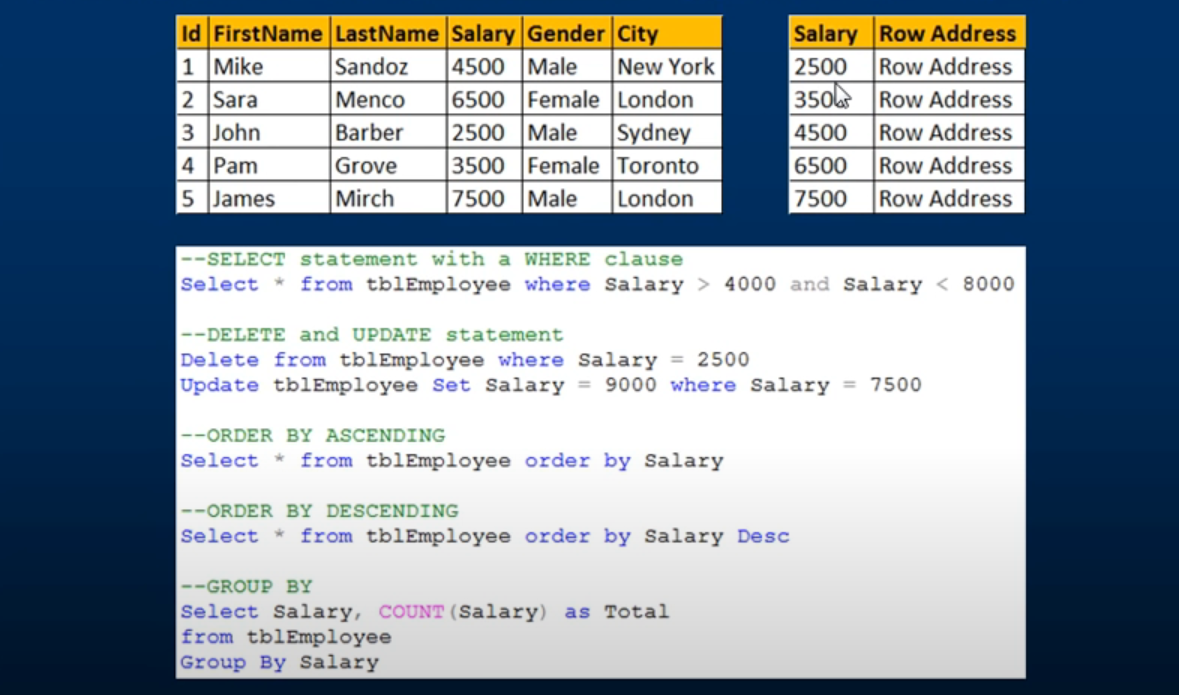

### Disadvantages
1. **Additional Disk Space:** Clustered Index does not, require any additional storage. Every Non-Clustered index requires additional space as it is stored separately from the table. The amount of space required will depend on the size of the table, and the number and types of columns used in the index.

2. **Insert Update and Delete statements can become slow:** When DML (Data Manipulation Language) statements (INSERT, UPDATE, DELETE) modifies data in a table, the data in all the indexes also needs to be updated. Indexes can help, to search and locate the rows, that we want to delete, but too many indexes to update can actually hurt the performance of data modifications.

3. **What is a covering query** - If all the columns that you have requested in the SELECT clause of query, are present in the index, then there is no need to lookup in the table again. The requested columns data can simply be returned from the index.

4. **A clustered index, always covers a query,** since it contains all of the data in a table. A composite index is an index on two or more columns. Both clustered and non-clustered indexes can be composite indexes. To a certain extent, a composite index, can cover a query.
